Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('Cardiotocographic.csv') #Loading dataset

In [140]:
df.shape

(2126, 14)

In [141]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [143]:
df.isnull().sum() #to check is there any null value

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [144]:
df.dropna(inplace=True) #to drop null values

In [145]:
df.isnull().sum() 

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [146]:
df.duplicated().sum() #to check duplicates

np.int64(2)

In [147]:
df.drop_duplicates(inplace=True) #to remove duplicates

In [148]:
df.duplicated().sum()

np.int64(0)

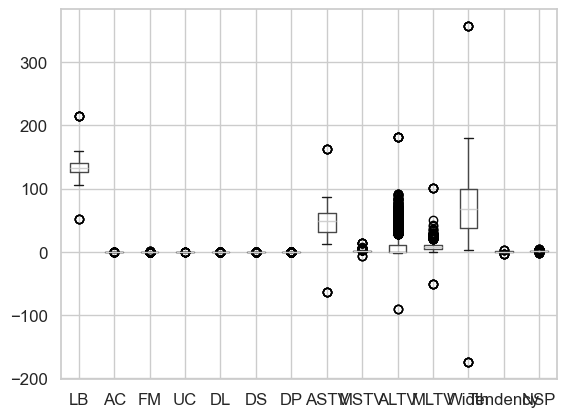

In [149]:
df.boxplot() #To check outliers
plt.show()

In [150]:
#outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

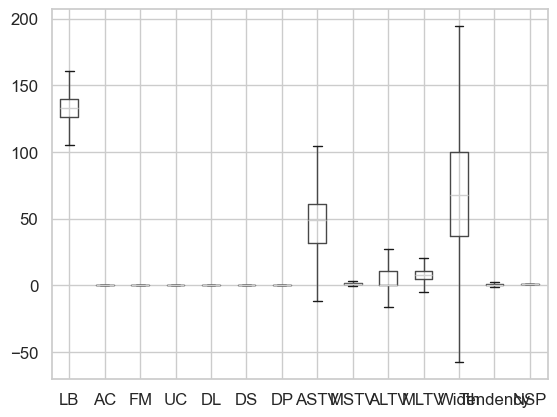

In [151]:
df.boxplot()
plt.show()

In [ ]:
df.agg(['mean','median','std']) #central tendency (mean, median) and dispersion(std,IQR)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
mean,133.291604,0.003144,0.001565,0.004361,0.001770,0.0,0.0,46.999304,1.301912,6.733464,8.017610,70.351685,0.319999,1.0
median,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
std,9.976211,0.003844,0.002477,0.003008,0.002675,0.0,0.0,17.633594,0.779896,10.400402,5.094192,39.773195,0.624916,0.0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

#### Key findings

LB (Baseline Fetal Heart Rate) → Stable around 133 BPM with low variation — a key consistent indicator.

ALTV (Abnormal Long-Term Variability) → Highly skewed (mean 6.7, median 0) — only a few abnormal cases.

ASTV (Accelerations) → Moderate variation (std 17.6) — could be useful for distinguishing conditions.

DS, DP, NSP → No variation — likely unimportant for analysis or modeling.

Width → High variability — may need normalization or outlier handling.

In [ ]:
# Histograms
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot (example)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='LB', y='ASTV', hue='NSP', palette='viridis')
plt.title("Scatter Plot: LB vs ASTV", fontsize=14)
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
features = [col for col in df.columns if col != 'NSP']

In [ ]:
# Violin plots for numeric variables by NSP
plt.figure(figsize=(15, 8))
for i, col in enumerate(features[:6], 1):  # First 6 features
    plt.subplot(2, 3, i)
    sns.violinplot(x='NSP', y=col, data=df, palette="Set2")
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Violin Plots of First 6 Numerical Features by NSP", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap Between Features", fontsize=16)
plt.show()

####    Pattern Recognition and Insights

DL ↔ MSTV (0.57) → Moderate positive relation, higher short-term variability linked with more decelerations.

MSTV ↔ Width (0.65) → Strong correlation, consistent with normal fetal variability behavior.

ASTV ↔ ALTV (0.44) → Moderate link, both rise together showing active fetal response.

DL ↔ Width (0.52) → More decelerations occur when variability width increases.

LB ↔ ASTV / ALTV (~0.3) → Slightly related; baseline heart rate changes with variability.

NSP weakly correlated → Outcome depends on multiple features, not a single one.

DS, DP near-zero correlation → Minimal influence, may be less important predictors.

####    Temporal Insight (if temporary data is available)

Analyze how features like ASTV, MSTV, and DL change over time — rising trends may indicate fetal distress or activity cycles.

Stable LB and UC patterns over time suggest healthy baseline and uterine conditions.

Fluctuating variability (Width or Tendency) could reveal transitions between active and resting fetal states.

   ###  Conclusion

The dataset primarily consists of numerical variables with moderate correlations among a few features such as MSTV–Width, DL–MSTV, and ASTV–ALTV, suggesting these pairs may influence fetal health conditions.

Most variables show weak interdependence, meaning no single factor dominates the NSP classification — it’s a combined effect of multiple physiological signals.

The lack of strong correlations indicates each parameter adds unique information, which is beneficial for machine learning models to learn diverse patterns.

Temporal trends (if tracked) could help monitor changes in fetal well-being over time, improving early detection of distress conditions.

Overall, these insights provide a solid foundation for predictive modeling and clinical decision-making, aiding doctors in assessing fetal health more accurately and efficiently.